In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = f"{4}"

## Load data

#### load multiple timesteps

In [19]:
samples = []
for i in range(3):
    s = np.load('/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult9600 Old/FpB_Interpolated_t{}_Velocity_9600_9600.npy'.format(i))
    samples.append(s)
    print(s.shape)

sampels_stacked = np.stack(samples)
print(sampels_stacked.shape)

# data = sampels_stacked

(9600, 9600)
(9600, 9600)
(9600, 9600)
(3, 9600, 9600)


## Define the model

##### 1 channel

In [4]:
# 1 channel
import torch
import torch.nn as nn

class ConvAutoencoder5Conv2ds(nn.Module):
    def __init__(self):
        super(ConvAutoencoder5Conv2ds, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=2, stride=2, padding=0),  # Layer 1
            nn.ReLU(True),
            nn.Conv2d(16, 32, kernel_size=2, stride=2, padding=0),  # Layer 2
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Layer 3
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=2, stride=2, padding=0),  # Layer 4
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=2, stride=2, padding=0),  # Layer 5
            nn.ReLU(True),
        )

       # Latent Space

        self.latentspace = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=5, stride=1, padding=0),  # Layer 1
            nn.ReLU(True),
            nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=0),  # Layer 2
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=0),  # Layer 3
            nn.ReLU(True)
        )


        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2, padding=0),  # Layer 1
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2, padding=0),  # Layer 2
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Layer 3
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2, padding=0),  # Layer 4
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2, padding=0),  # Layer 5
            nn.Identity()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the autoencoder
autoencoder = ConvAutoencoder5Conv2ds()

# You can print the model to see its updated architecture
print(autoencoder)

/home/dg321/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ConvAutoencoder5Conv2ds(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): ReLU(inplace=True)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (9): ReLU(inplace=True)
  )
  (latentspace): Sequential(
    (0): Conv2d(256, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inp

## Load saved model

In [5]:
# Load the saved autoencoder
autoencoder = ConvAutoencoder5Conv2ds()  # Assuming you have the ConvAutoencoder class defined
autoencoder.load_state_dict(torch.load('./models/autoencoder_Velocity_100timesteps_100epochs_lr0.002.pth'))



autoencoder.eval()  # Set the autoencoder to evaluation mode

ConvAutoencoder5Conv2ds(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): ReLU(inplace=True)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (9): ReLU(inplace=True)
  )
  (latentspace): Sequential(
    (0): Conv2d(256, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inp

In [8]:
# Assuming you have already defined your autoencoder
# autoencoder = Autoencoder()

# Load your dataP as you did
dataP = samples[2][0]
size_start = 0
size_end = 9600

# Extract a region of interest and prepare it for input
data_rotated = np.rot90(dataP[size_start:size_end, size_start:size_end], 1).copy()
input_data = torch.from_numpy(data_rotated).unsqueeze(0).float()

# Pass the input through the encoder to get the latent variable
with torch.no_grad():
    latent_space_output = autoencoder.encoder(input_data)

print('Latent space shape:', latent_space_output.shape)

Latent space shape: torch.Size([256, 300, 300])


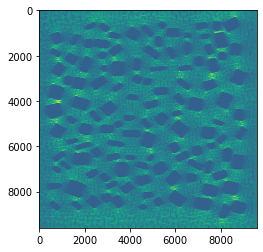

In [14]:
plt.imshow(data_rotated[:,:], interpolation='none')

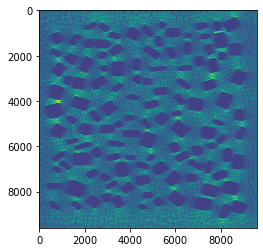

In [12]:
reconstructed_output = autoencoder.decoder(latent_space_output).detach().numpy()
plt.imshow(reconstructed_output[0,:,:], interpolation='none')

In [7]:
latent_space_output = latent_space_output.detach().numpy()
print(latent_space_output.shape)

(256, 300, 300)


In [21]:
latent_samples = []
for i in range(2):
    # Assuming you have already defined your autoencoder
    # autoencoder = Autoencoder()

    # Load your dataP as you did
    dataP = samples[i]
    size_start = 0
    size_end = 9600

    # Extract a region of interest and prepare it for input
    data_rotated = np.rot90(dataP[size_start:size_end, size_start:size_end], 1).copy()
    input_data = torch.from_numpy(data_rotated).unsqueeze(0).float()

    # Pass the input through the encoder to get the latent variable
    with torch.no_grad():
        latent_space_output = autoencoder.encoder(input_data)

    print('Latent space shape:', latent_space_output.shape)

    latent_space_output = latent_space_output.detach().numpy()
    latent_samples.append(latent_space_output)

Latent space shape: torch.Size([256, 300, 300])
Latent space shape: torch.Size([256, 300, 300])


In [22]:
latent_samples_stacked = np.stack(latent_samples)

In [23]:
print(latent_samples_stacked.shape)

(2, 256, 300, 300)
